# libraries

* torchvision
* torchvision.datasets - get datasets
* torchvision.models - pretrained computer vision models
* torchvision.transforms - functions for manipulating vision data
* torch.utils.data.Dataset
* torch.utils.data.DataLoader - python iterable over a dataset


In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

1.13.0+cu116
0.14.0+cu116


## 1. getting a dataset

FashionMNIST

In [ ]:
## Training data

train_data = datasets.FashionMNIST(
    root="data", # where to download data to,
    train=True, # do we want the training dataset
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data to,
    train=False, # do we want the training dataset
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# see the first training exmaple
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
print(f"Image shape: {image.shape} -> [color_channel], [height], [width]")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28]) -> [color_channel], [height], [width]
Label: 9


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

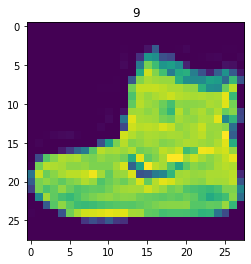

In [ ]:
## 1.2 visualize our data

import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
# image


Text(0.5, 1.0, 'Ankle boot')

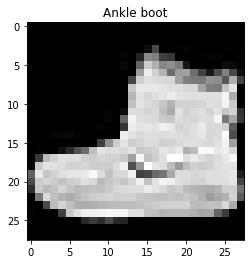

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

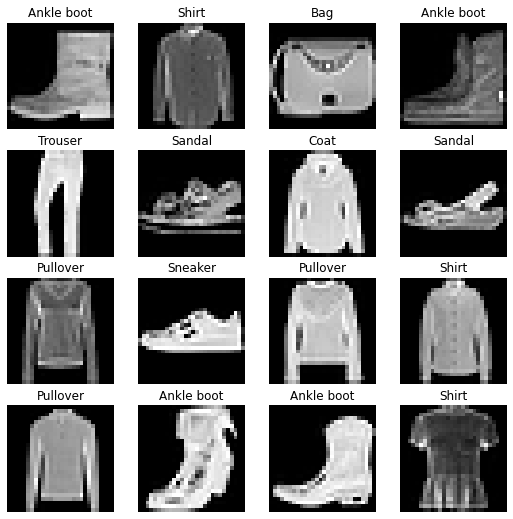

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. prepare dataloader

Right now, our data is in the form of pytorch datasets

dateloader turns our dataset into a python iterable

more specifically, we want to turn our data into batches

why would we do this

1. it is more computationally efficient, as in, your computing hardware may not be able to look at 6000 images in one hit. so we break it down to 32 iamges at a time\
2. it gives our neural network ore changes to update it gradients per epoch

In [ ]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                               batch_size=BATCH_SIZE,
                               shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7ff0f9256a90>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff0f9256a00>)

In [ ]:
print(f"Lenght of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")

Lenght of train_dataloader: 1875 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])


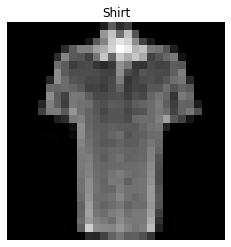

In [ ]:
## show a sample

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")


## 3. model 0: build as baseline model

when starting to build a series of machine learning modeling experiments, its best practice to start with a baseline model

a baseline mode is a simple mode
start simply and add complexity when necessary

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [ ]:
# Flatten the sample

output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color channels, height, widht]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height* widht]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, widht]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height* widht]


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, ## 28*28
                              hidden_units=10, ## how many units in the hidden layer
                              output_shape=len(class_names)
).to("cpu")




In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

# loss and optimizer and evaluation metrics

* Loss function - nn.CrossEntropyLoss()
* Optimizer = torch.optim.SGD
* evaluation metric - accuracy

In [ ]:
import requests

from pathlib import Path

if Path("helper_function.py").is_file():
  print("Already a file")
else:
  print("Downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Downloading


In [ ]:
# import accuracy metric

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

# 3.2 creating a function to time our experiments

ML is very experimental:
1. model's performance
2. how fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end:float,
                     device: torch.device = None):
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f}")
  return total_time


In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="CPU")

Train time on CPU: 0.000


4.108899999977211e-05

# 3.3 creating a training loop and training a model with batches of data


1. loop throuhg epochs
2. loop through training batches, perform training steps, calculate the train loss per batch
3. loop through testing batches, perform testing steps, calculate the test loss per batch
4. print out whats happneing
5. time it all

In [ ]:
from tqdm.auto import tqdm # progress bar

# set the seed and start the time

torch.manual_seed(42)

train_time_start_on_cpu = timer()

# set the number of epochs

epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_loss = 0
  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)

    #calculate the loss

    loss = loss_fn(y_pred, y)
    # acc = accuracy_fn(y_true=y,
    #                   y_pred=y_pred.argmax(dim=1))
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
 # divide the total train loss by length of train dataloader

  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=next(model_0.parameters()).device)







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.5904 | Test Loss: 0.4743 | Test Acc: 83.3100
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.4763 | Test Loss: 0.4395 | Test Acc: 84.6333
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.4550 | Test Loss: 0.4303 | Test Acc: 84.9417
Train time on cpu: 31.506


In [ ]:
## Make prediction and get model 0 results

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """
  Returns a dictionary containing the results of model predicting on data_loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4302613139152527,
 'model_acc': 84.94166666666666}

# 5. set up device agnostic code

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
## functionizing training and evaluation testing loops
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """
  Performs a training with model trying to learn on dataloader
  """
  train_loss, train_acc = 0, 0

  model.train()
  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)
    model.train()
    y_pred = model(X)

    #calculate the loss

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

 # divide the total train loss by length of train dataloader

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}%")






In [ ]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}---------")

  train_step(model=model_1,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

  test_step(model=model_1,
               dataloader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)

train_end = timer()
total_train_time_model_1 = print_train_time(start=train_start, end=train_end, device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0---------
Train Loss: 1.4218 | Train Acc: 54.2867%
Test Loss: 1.1052 | Test Acc: 63.0533
Epoch: 1---------
Train Loss: 1.0336 | Train Acc: 64.6117%
Test Loss: 0.9803 | Test Acc: 65.5950
Epoch: 2---------
Train Loss: 0.9600 | Train Acc: 66.0517%
Test Loss: 0.9401 | Test Acc: 66.3967
Train time on cpu: 45.160


# Sometimes depending on your data/hardware you might find that your model trains faster on cpu that cpu

why is this?

1. could be the overhead for copying data/model to and from the gpu outweights the compute benefits offered by the GPU
2. CPU could just be better than GPU

In [ ]:
# get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

TypeError: ignored

In [ ]:

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
  """
  Returns a dictionary containing the results of model predicting on data_loader
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(dataloader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
# calculate model 0 results on test dataset

model_1_results = eval_model(model=model_1,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9400759339332581,
 'model_acc': 66.39666666666666}

## model 2: building a convolutional neural network (CNN)
known for finding patterns in data

In [ ]:
## create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  """
  model architecture that replicates the tinyvgg model from cnn explainer website
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*49,
                  out_features=output_shape)
    )

  def forward(self, x):
    x=self.conv_block_1(x)
    # print(x.shape)
    x=self.conv_block_2(x)
    # print(x.shape)
    x=self.classifier(x)
    return x


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # input = 1 because we are using black and white
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
## 7.1 stepping through nn.Conv2d

torch.manual_seed(42)
# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))

test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Simple image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Simple image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
## create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3, # equivalent to (3,3)
                       stride=1,
                       padding=0)

## pas the data through the convolutional layer

conv_output=conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8912e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],

         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
     

In [ ]:
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
## 7.2 stepping through nn.MaxPool2d()
print(f"test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

maxpool_layer = nn.MaxPool2d(
    kernel_size=2
)

test_image_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through conv_layer(): {test_image_conv.shape}")

test_image_conv_maxpool = maxpool_layer(test_image_conv)
print(f"Shape after going through conv_layer() and maxpool_layer(): {test_image_conv_maxpool.shape}")

test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and maxpool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1, 1, 2, 2))

# max pool
maxpool_layer = nn.MaxPool2d(
    kernel_size=2
)

max_pool_tensor = maxpool_layer(random_tensor)
print(f"Max pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


# max pool compresses the most important features of an image

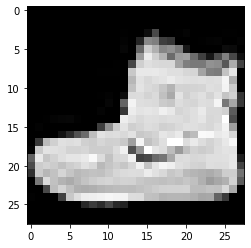

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).to(device)
rand_image_tensor

tensor([[[ 1.7878e+00, -4.7805e-01, -2.4286e-01, -9.3416e-01, -2.4826e-01,
          -1.2082e+00, -4.7767e-01,  5.2013e-01, -1.5673e+00, -2.3945e-01,
           2.3228e+00, -9.6337e-01,  2.0024e+00,  4.6643e-01,  1.5730e+00,
          -9.2283e-01,  3.5586e-01, -6.8662e-01, -4.9336e-01,  2.4149e-01,
          -1.1109e+00,  9.1546e-02, -2.3169e+00, -2.1680e-01, -3.0973e-01,
          -3.9571e-01,  8.0341e-01, -6.2160e-01],
         [-5.9200e-01, -6.3074e-02, -8.2855e-01,  3.3090e-01,  3.4912e-02,
           3.2110e-01,  1.5736e+00, -8.4547e-01,  1.3123e+00,  6.8716e-01,
          -1.0892e+00, -3.5529e-01, -1.4181e+00,  8.9627e-01,  4.9905e-02,
           2.2667e+00,  1.1790e+00, -4.3445e-01, -1.3864e+00, -1.2862e+00,
          -8.3712e-01, -9.2239e-01,  1.8113e+00,  1.6056e-01,  3.6725e-01,
           1.7541e-01,  1.3852e+00, -4.4585e-01],
         [-1.2024e+00,  7.0781e-01, -1.0759e+00,  5.3565e-01,  1.1754e+00,
           5.6117e-01, -4.5275e-01, -7.7178e-01,  1.4534e-01,  2.3105e-01,


In [ ]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], grad_fn=<AddmmBackward0>)

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(dataloader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in dataloader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
## 7.3 setup a loss function and optimizer

#
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_2.parameters(),
    lr=0.01
)

In [ ]:
## train and test

torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer

start_time = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}----------")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
             dataloader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

end_time = timer()

total_train_time = print_train_time(start=start_time,
                                    end=end_time,
                                    device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0----------
Train loss: 1.03777 | Train accuracy: 62.34%
Test loss: 0.59772 | Test accuracy: 78.33%

Epoch: 1----------
Train loss: 0.54951 | Train accuracy: 80.00%
Test loss: 0.46816 | Test accuracy: 82.85%

Epoch: 2----------
Train loss: 0.45585 | Train accuracy: 83.55%
Test loss: 0.41170 | Test accuracy: 85.25%

Train time on cpu: 137.850


In [ ]:
# get results dict

model_2_results = eval_model(model=model_2, dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/1875 [00:00<?, ?it/s]

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.41170305013656616,
 'model_acc': 85.25166666666667}

In [ ]:
## compare model results and training time

import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.430261,84.941667
1,FashionMNISTModelV1,0.940076,66.396667
2,FashionMNISTModelV2,0.411703,85.251667


In [ ]:
## add training time to results comparison
compare_results["training_time"] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time
]

In [ ]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.430261,84.941667,31.506343
1,FashionMNISTModelV1,0.940076,66.396667,45.159591
2,FashionMNISTModelV2,0.411703,85.251667,137.849751


Text(0, 0.5, 'model')

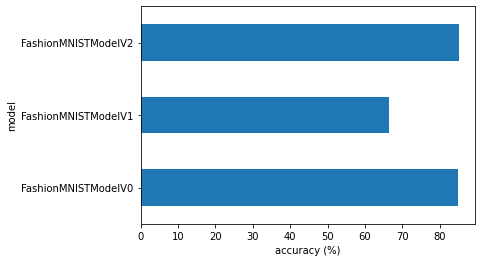

In [ ]:
# visualize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [ ]:
# make and evaluate random prediction with best model

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # forward pass
      pred_logit = model(sample)
      # get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off the gpu for further calculations

      pred_probs.append(pred_prob.cpu())

      # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

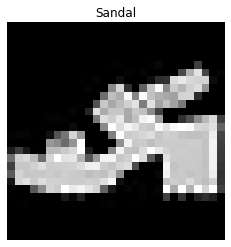

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [ ]:
## make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

## view first two prediction probabilities

pred_probs[:2]

tensor([[1.4876e-07, 2.6490e-08, 5.7573e-08, 5.4522e-08, 1.0177e-08, 9.6509e-01,
         7.1819e-08, 6.8845e-05, 4.4666e-04, 3.4396e-02],
        [3.1053e-02, 7.5151e-01, 7.2994e-04, 2.0485e-01, 7.8153e-03, 6.5339e-05,
         3.1247e-03, 1.3475e-04, 7.1218e-04, 3.5843e-06]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

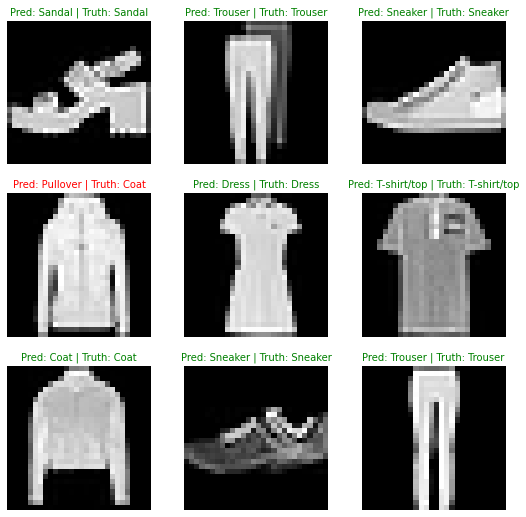

In [ ]:
## plot prediction

plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1)
  # plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')
  # find the prediction lable in text form
  pred_label = class_names[pred_classes[i]]
  # get the truth label
  truth_label = class_names[test_labels[i]]
  # create a title for the plot

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

## making a confusion matrix for further prediction evaluation

good for evaluating classification models visually

1. make predictions with our trained model on the test dataset
2. make a confusion matrix with torchmetrics.ConfusionMatrix
3. plot the confusion matrix using mlxtend

In [ ]:
from tqdm.auto import tqdm
# 1 make predictions with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    # put predictions on cpu
    y_preds.append(y_pred.cpu())

  # print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
y_pred_tensor

tensor([9, 0, 3,  ..., 3, 6, 5])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.21.0


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion instance and compare preds
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

In [ ]:
confmat_tensor

tensor([[555,   6,  31, 105,   6,   3, 279,   0,  15,   0],
        [ 23, 694,  13, 249,  13,   1,   3,   1,   3,   0],
        [ 13,   3, 710,  24, 109,   0, 126,   0,  15,   0],
        [ 25,  14,  13, 869,  30,   0,  37,   1,  11,   0],
        [  4,   8, 174,  66, 564,   0, 167,   0,  17,   0],
        [  4,   1,   1,   3,   0, 745,   1, 108, 109,  28],
        [ 89,   5, 126,  84,  74,   1, 599,   0,  22,   0],
        [  1,   0,   0,   0,   0,  36,   0, 920,  14,  29],
        [  6,   4,  13,   9,   5,   5,  28,   5, 925,   0],
        [  0,   0,   0,   1,   1,  65,   1, 145,  21, 766]])

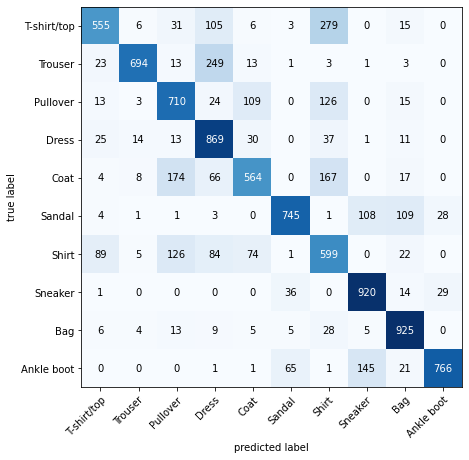

In [ ]:
# 3 plt the confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
## save and load the model

from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
# create model save

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

In [ ]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_dict = eval_model(
    model=loaded_model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
loaded_model_2_dict

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.4405914843082428,
 'model_acc': 84.15535143769968}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_dict["model_loss"]),
              atol=1e-01)

tensor(True)

In [ ]:
torch.randn(size=(1, 3, 3))

tensor([[[ 0.2345,  0.2303, -1.1229],
         [-0.1863,  2.2082, -0.6380],
         [ 0.4617,  0.2674,  0.5349]]])